Background: Dogecoin is a memecoin because it was created as a joke but has attracted a lot of attention when it ranked top 10 with ~33B USD market cap

Context: In Dogecoin's perspective, how does Elon Musk tweeting about Dogecoin influence the Google search engagement and crypto market value

Hypotheses

1. Elon Musk tweeting about Dogecoin heavily impacts the cryto price
    - Analyze the reaction of Dogecoin price 10 mins after Elon Musk tweeted about it >> not significant
    - extend to 6 hrs becomes significant
2. Elon Musk tweeting about Dogecoin heavily impacts the Google search trends
    - Alanlyze possible delayed effect of Elon Musk's tweet on Dogecoin' Google search trends
    - 4 day lag shows significance

### Import Packages

In [68]:
import pandas as pd
import ccxt
from datetime import datetime,timedelta
import numpy as np
from pytrends.request import TrendReq
from dateutil import parser
import matplotlib.pyplot as plt 
import statsmodels.api as sm

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### Read Dogecoin Tweets and Cyrpto Price to Merge

In [69]:
tweets_df = pd.read_csv('data/dogecoin_tweets.csv')
tweets_df['timestamp'] = pd.to_datetime(tweets_df['timestamp'])

dogecoin_price_df = pd.read_csv('data/price_clean.csv')

dogecoin_price_df['timestamp'] = pd.to_datetime(dogecoin_price_df['timestamp'], unit='ms')
dogecoin_price_df.sort_values(by='timestamp', inplace=True)
merge_df = pd.merge(left=dogecoin_price_df, right=tweets_df, how='left', on='timestamp')
merge_df.head()

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count
0,2020-12-20 08:30:00,0.003920,0.003930,0.003920,0.003922,1487104.0,NaN,NaN,NaN,NaN
1,2020-12-20 08:31:00,0.003925,0.003925,0.003922,0.003922,181327.0,NaN,NaN,NaN,NaN
2,2020-12-20 08:32:00,0.003922,0.003922,0.003922,0.003922,0.0,NaN,NaN,NaN,NaN
3,2020-12-20 08:33:00,0.003922,0.003922,0.003922,0.003922,0.0,NaN,NaN,NaN,NaN
4,2020-12-20 08:34:00,0.003922,0.003923,0.003922,0.003922,167833.0,NaN,NaN,NaN,NaN


In [70]:
# Proprocess the price data
# select the tweet_content col that is not null
twitter_index = merge_df[merge_df['tweet_content'].notnull()].index
merge_df.loc[twitter_index, 'tweet'] =True # If it is the time that Musk tweeted


# Calculate the change in price
merge_df['price_change'] = (merge_df['close']-merge_df['open'])/merge_df['open']



In [71]:
# Identify the timestamp with gaps
timestamp_gap_index = []
timestamp_col = merge_df["timestamp"]
for i, timestamp in enumerate(timestamp_col):
    if (i!=0) and abs(parser.parse(str(timestamp))-parser.parse(str(timestamp_col[i-1])))>timedelta(minutes=1):
            timestamp_gap_index.append(i)
merge_df.loc[timestamp_gap_index,'time_gap']=True
merge_df.loc[timestamp_gap_index,["price_change"]]=np.nan # Fill the gap with nan
timestamp_gap_index


[120,
 292,
 412,
 532,
 652,
 772,
 892,
 1012,
 1132,
 1263,
 1383,
 1503,
 1623,
 1743,
 1863,
 1983,
 2103,
 2263,
 2424]

In [72]:
# add diffence date 
merge_df.head(100)

,timestamp,open,high,low,close,volume,tweet_content,retweet_count,quote_count,like_count,tweet,price_change,time_gap
0,2020-12-20 08:30:00,0.003920,0.003930,0.003920,0.003922,1487104.0,NaN,NaN,NaN,NaN,NaN,0.000485,NaN
1,2020-12-20 08:31:00,0.003925,0.003925,0.003922,0.003922,181327.0,NaN,NaN,NaN,NaN,NaN,-0.000713,NaN
2,2020-12-20 08:32:00,0.003922,0.003922,0.003922,0.003922,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
3,2020-12-20 08:33:00,0.003922,0.003922,0.003922,0.003922,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
4,2020-12-20 08:34:00,0.003922,0.003923,0.003922,0.003922,167833.0,NaN,NaN,NaN,NaN,NaN,0.000051,NaN
5,2020-12-20 08:35:00,0.003922,0.003923,0.003922,0.003922,105150.0,NaN,NaN,NaN,NaN,NaN,-0.000051,NaN
6,2020-12-20 08:36:00,0.003917,0.003917,0.003915,0.003915,81806.0,NaN,NaN,NaN,NaN,NaN,-0.000587,NaN
7,2020-12-20 08:37:00,0.003922,0.003926,0.003922,0.003923,752872.0,NaN,NaN,NaN,NaN,NaN,0.000382,NaN
8,2020-12-20 08:38:00,0.003922,0.003922,0.003920,0.003920,220340.0,NaN,NaN,NaN,NaN,NaN,-0.000484,NaN
9,2020-12-20 08:39:00,0.003920,0.003920,0.003920,0.003920,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [73]:
# Select the index between two time_gap which before the tweet time
price_change_before_twitter_list = []
price_change_after_twitter_list = []
volume_before_twitter_list = []
volume_after_twitter_list = []
volatility_before_twitter_list = []
volatility_after_twitter_list = []
for count,index in enumerate(timestamp_gap_index):
    if count!=0:
        dfm_temp = merge_df.loc[timestamp_gap_index[count-1]:index-1]
    else:
        dfm_temp = merge_df.loc[0:index-1]
    # Analysis
    # Find the first tweet index 
    first_tweet_index = dfm_temp[dfm_temp['tweet']==True].index[0]
    # Find the last tweet index
    last_tweet_index = dfm_temp[dfm_temp['tweet']==True].index[-1]
    # Find the first price change before the first tweet
    price_change_before_twitter = list(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['price_change'])
    price_change_before_twitter_list.extend(price_change_before_twitter)
    # Find the last price change after the last tweet
    price_change_after_twitter = list(dfm_temp.loc[last_tweet_index:]['price_change'])
    price_change_after_twitter_list.extend(price_change_after_twitter)
    # Find the first volume before the first tweet
    volume_before_twitter_list.extend(list(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['volume']))
    # Find the last volume after the last tweet
    volume_after_twitter_list.extend(list(dfm_temp.loc[last_tweet_index:]['volume']))
    # Find the first volatility before the first tweet
    volatility_before_twitter_list.append(dfm_temp.loc[dfm_temp.index[0]:first_tweet_index]['price_change'].std())
    # Find the last volatility after the last tweet
    volatility_after_twitter_list.append(dfm_temp.loc[last_tweet_index:]['price_change'].std()) 
    

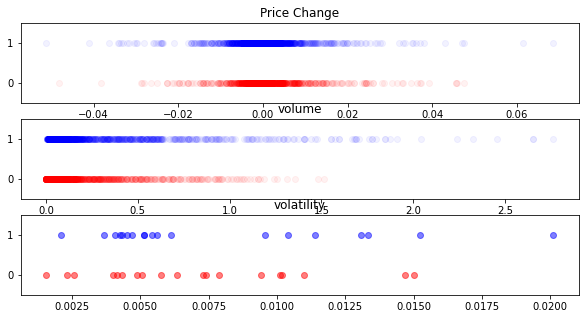

In [74]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

# draw the scatter plot of price change
ax1.set_title('Price Change')
ax1.set_ylim(-0.5,1.5,1)
ax1.scatter(price_change_before_twitter_list, [0]*len(price_change_before_twitter_list), marker='o', color='r', alpha=0.05)
ax1.scatter(price_change_after_twitter_list, [1]*len(price_change_after_twitter_list), marker='o', color='b', alpha=0.05)

ax2.set_title('volume')
ax2.set_ylim(-0.5,1.5,1)
ax2.scatter(volume_before_twitter_list, [0]*len(volume_before_twitter_list), marker='o', color='r', alpha=0.05)
ax2.scatter(volume_after_twitter_list, [1]*len(volume_after_twitter_list), marker='o', color='b', alpha=0.05)

ax3.set_title('volatility')
ax3.set_ylim(-0.5,1.5,1)
ax3.scatter(volatility_before_twitter_list, [0]*len(volatility_before_twitter_list), marker='o', color='r', alpha=0.5)
ax3.scatter(volatility_after_twitter_list, [1]*len(volatility_after_twitter_list), marker='o', color='b', alpha=0.5)


In [75]:
# Hypothesis:
# There is a significant change between the price change before and after the tweet
# There is a significant change between the volume before and after the tweet
# There is a significant change between the volatility before and after the tweet


# X =np.array([0]*len(price_change_before_twitter_list)+[1]*len(price_change_after_twitter_list)).astype("int")
# Y = np.array(price_change_before_twitter_list+price_change_after_twitter_list).astype('float64')
# dfm_price_change = pd.DataFrame({'X':X, 'Y':Y})
# dfm_price_change.dropna(inplace=True)
# X = dfm_price_change["X"]
# Y = dfm_price_change["Y"]
# # print(X,Y)
# X = sm.add_constant(X)
# lm = sm.OLS(Y,X).fit()
# print (lm.summary()) 

X=np.array([0]*len(volume_before_twitter_list)+[1]*len(volume_after_twitter_list)).astype("int")
Y = np.array(volume_before_twitter_list+volume_after_twitter_list).astype('float64')
dfm_volume = pd.DataFrame({'X':X, 'Y':Y})
dfm_volume.dropna(inplace=True)
X = dfm_volume["X"]
Y = dfm_volume["Y"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())

# X=np.array([0]*len(volatility_before_twitter_list)+[1]*len(volatility_after_twitter_list)).astype("int")
# Y = np.array(volatility_before_twitter_list+volatility_after_twitter_list).astype('float64')
# dfm_volatility = pd.DataFrame({'X':X, 'Y':Y})
# dfm_volatility.dropna(inplace=True)
# X = dfm_volatility["X"]
# Y = dfm_volatility["Y"]
# # print(X,Y)
# X = sm.add_constant(X)
# lm = sm.OLS(Y,X).fit()
# print (lm.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     61.48
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           6.80e-15
Time:                        16:28:49   Log-Likelihood:                -43018.
No. Observations:                2299   AIC:                         8.604e+04
Df Residuals:                    2297   BIC:                         8.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.819e+07   9.51e+05     19.129      0.0

# Google trends

In [83]:
pytrend = TrendReq()
pytrend.build_payload(kw_list = ["doge"],timeframe='2020-12-01 2021-07-31')
trends = pytrend.interest_over_time()
trendsdf_part1 = pd.DataFrame(data = {'date': trends.index.tolist(),
                                'search': trends["doge"].tolist()})
pytrend.build_payload(kw_list = ["doge"],timeframe='2021-08-01 2021-12-31')
trends = pytrend.interest_over_time()
trendsdf_part2 = pd.DataFrame(data = {'date': trends.index.tolist(),
                                'search': trends["doge"].tolist()})
trendsdf = trendsdf_part1.append(trendsdf_part2)
trendsdf['date'] = pd.to_datetime(trendsdf['date']).dt.date
tweets_df["timestamp"] = pd.to_datetime(tweets_df["timestamp"]).dt.date
merged_dfm = pd.merge(left=tweets_df, right=trendsdf, how='right', left_on='timestamp',right_on='date')
merged_dfm.sort_values(by='date', inplace=True)


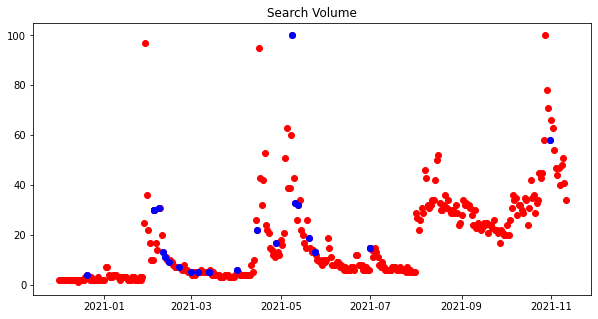

In [84]:
# plt search scatter 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Search Volume')
plt.scatter(merged_dfm["date"],merged_dfm["search"], marker='o', color='r')
plt.scatter(merged_dfm.dropna()["date"],merged_dfm.dropna()["search"], marker='o', color='b')

In [85]:
# Hypothesis:
# There is a significant change between the search change with or without the tweet
merged_dfm
merged_dfm["with_tweet"] = merged_dfm["tweet_content"].isna()
merged_dfm["with_tweet"] = merged_dfm["with_tweet"].apply(lambda x: 0 if x else 1)

X = merged_dfm["with_tweet"]
Y = merged_dfm["search"]
# print(X,Y)
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())


                            OLS Regression Results                            
Dep. Variable:                 search   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6974
Date:                Sat, 13 Nov 2021   Prob (F-statistic):              0.404
Time:                        16:55:48   Log-Likelihood:                -1504.2
No. Observations:                 352   AIC:                             3012.
Df Residuals:                     350   BIC:                             3020.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5368      0.964     18.185      0.0

In [86]:
merged_dfm["latest_date_of_tweets"] = merged_dfm["timestamp"].fillna(method="ffill")
merged_dfm["latest_tweets_retweet_count"] = merged_dfm["retweet_count"].fillna(method="ffill")
merged_dfm["latest_tweets_quote_count"] = merged_dfm["quote_count"].fillna(method="ffill") 
merged_dfm["latest_tweets_like_count"] = merged_dfm["like_count"].fillna(method="ffill")

merged_dfm.dropna(subset=["latest_tweets_like_count"], inplace=True)
# merged_dfm

In [87]:
merged_dfm
day_lag = 3
merged_dfm[f"in_{day_lag}_days"] = merged_dfm["diff_dates"].apply(lambda x:0 if x>timedelta(day_lag) else 1)
X = merged_dfm[f"in_{day_lag}_days"]# 'latest_tweets_quote_count','latest_tweets_like_count']]
Y = merged_dfm["search"]
# print(X,Y)f"in_{day_lag}_days"
X = sm.add_constant(X)
lm = sm.OLS(Y,X).fit()
print (lm.summary())

KeyError: 'diff_dates'

In [ ]:
merged_dfm

,timestamp,tweet_content,retweet_count,quote_count,like_count,date,search,with_tweet,latest_date_of_tweets,diff_dates,in_4_days
0,NaN,NaN,NaN,NaN,NaN,2020-12-01,2,0,NaN,NaT,1
1,NaN,NaN,NaN,NaN,NaN,2020-12-02,2,0,NaN,NaT,1
2,NaN,NaN,NaN,NaN,NaN,2020-12-03,2,0,NaN,NaT,1
3,NaN,NaN,NaN,NaN,NaN,2020-12-04,2,0,NaN,NaT,1
4,NaN,NaN,NaN,NaN,NaN,2020-12-05,2,0,NaN,NaT,1
5,NaN,NaN,NaN,NaN,NaN,2020-12-06,2,0,NaN,NaT,1
6,NaN,NaN,NaN,NaN,NaN,2020-12-07,2,0,NaN,NaT,1
7,NaN,NaN,NaN,NaN,NaN,2020-12-08,2,0,NaN,NaT,1
8,NaN,NaN,NaN,NaN,NaN,2020-12-09,2,0,NaN,NaT,1
9,NaN,NaN,NaN,NaN,NaN,2020-12-10,2,0,NaN,NaT,1
